In [14]:
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegressionModel
from pyspark.ml.feature import VectorAssembler

# Initialize Spark Session
spark = SparkSession.builder.appName('stock_price_prediction').getOrCreate()

# Load data (replace 'data.csv' with your actual data path)
df1 = spark.read.csv('Downloads/AMZN.csv', inferSchema=True, header=True)
df2 = spark.read.csv('Downloads/SONY.csv', inferSchema=True, header=True)
df3 = spark.read.csv('Downloads/NFLX.csv', inferSchema=True, header=True)
df4 = spark.read.csv('Downloads/META.csv', inferSchema=True, header=True)

# Load the saved model (replace 'path/to/model' with the actual path of your saved model)
model=LinearRegressionModel.load("G:/Saved model 2")
    
# Define features column (replace 'feature1', 'feature2', etc. with your actual feature columns)
assembler = VectorAssembler(inputCols=['Open', 'High', 'Low'], outputCol='Features')

amzn_data=assembler.transform(df1)
sony_data=assembler.transform(df2)
nflx_data=assembler.transform(df3)
meta_data=assembler.transform(df4)

amzn_predictions = model.transform(amzn_data)
sony_predictions = model.transform(sony_data)
nflx_predictions = model.transform(nflx_data)
meta_predictions = model.transform(meta_data)


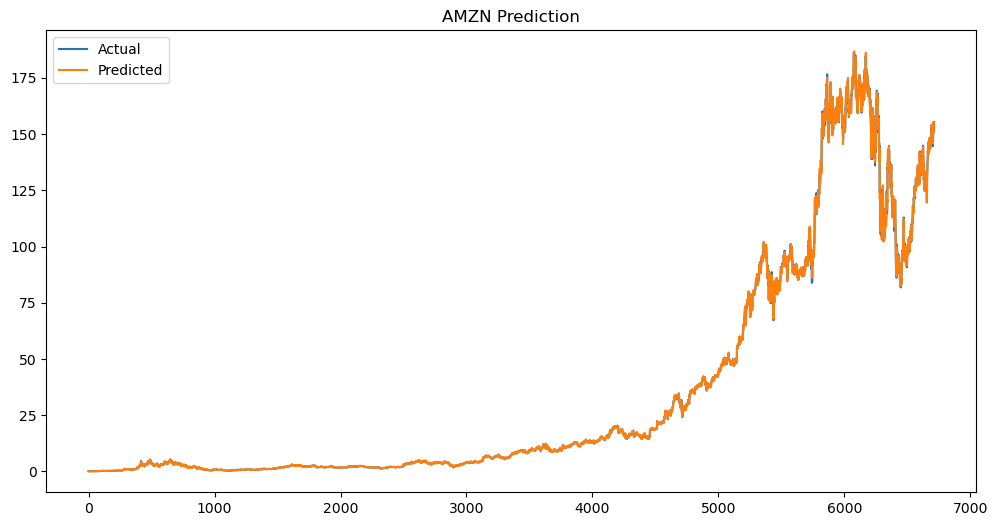

In [15]:
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas DataFrame
amzn_predictions_pd = amzn_predictions.toPandas()

plt.figure(figsize=(12,6))
plt.plot(amzn_predictions_pd['Close'], label='Actual')
plt.plot(amzn_predictions_pd['prediction'], label='Predicted')
plt.title('AMZN Prediction')
plt.legend()
plt.show()

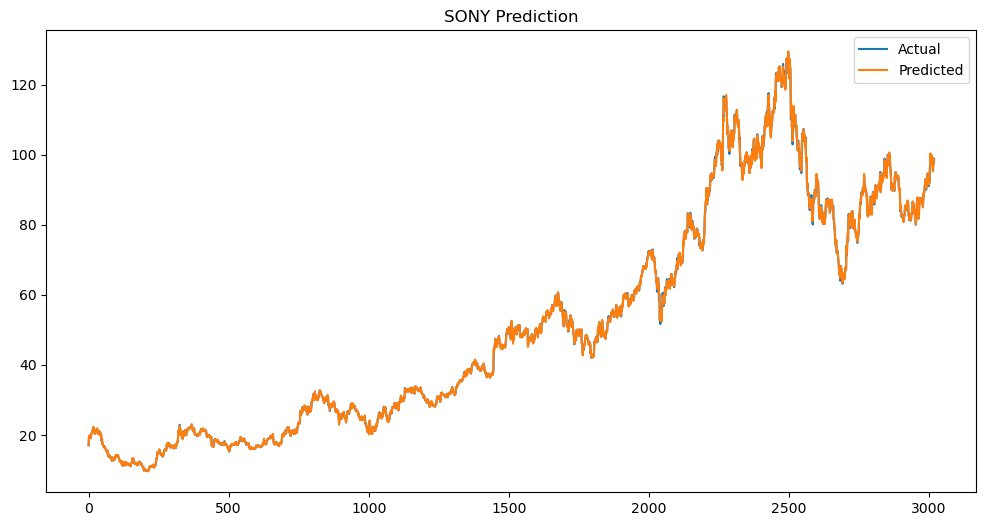

In [16]:
# Convert Spark DataFrame to Pandas DataFrame
sony_predictions_pd = sony_predictions.toPandas()

plt.figure(figsize=(12,6))
plt.plot(sony_predictions_pd['Close'], label='Actual')
plt.plot(sony_predictions_pd['prediction'], label='Predicted')
plt.title('SONY Prediction')
plt.legend()
plt.show()

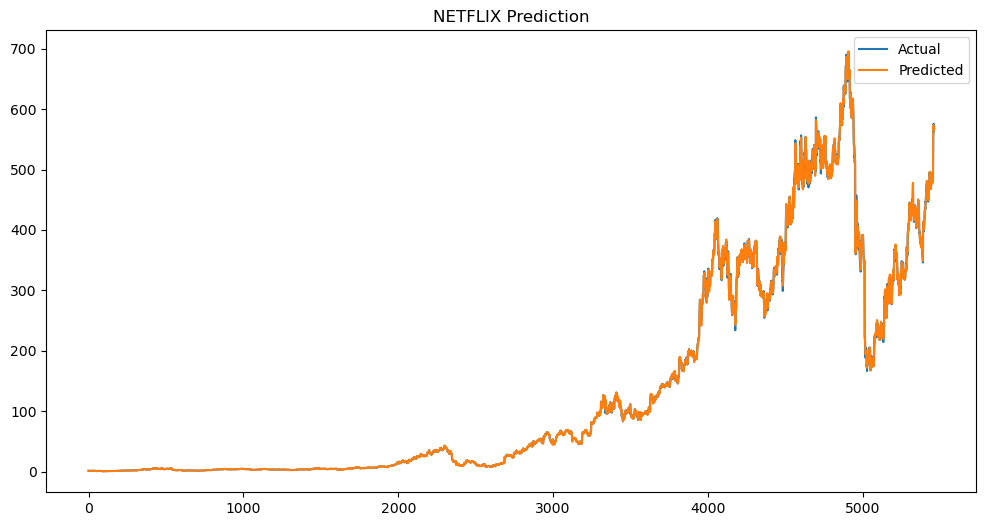

In [17]:
# Convert Spark DataFrame to Pandas DataFrame
nflx_predictions_pd = nflx_predictions.toPandas()

plt.figure(figsize=(12,6))
plt.plot(nflx_predictions_pd['Close'], label='Actual')
plt.plot(nflx_predictions_pd['prediction'], label='Predicted')
plt.title('NETFLIX Prediction')
plt.legend()
plt.show()

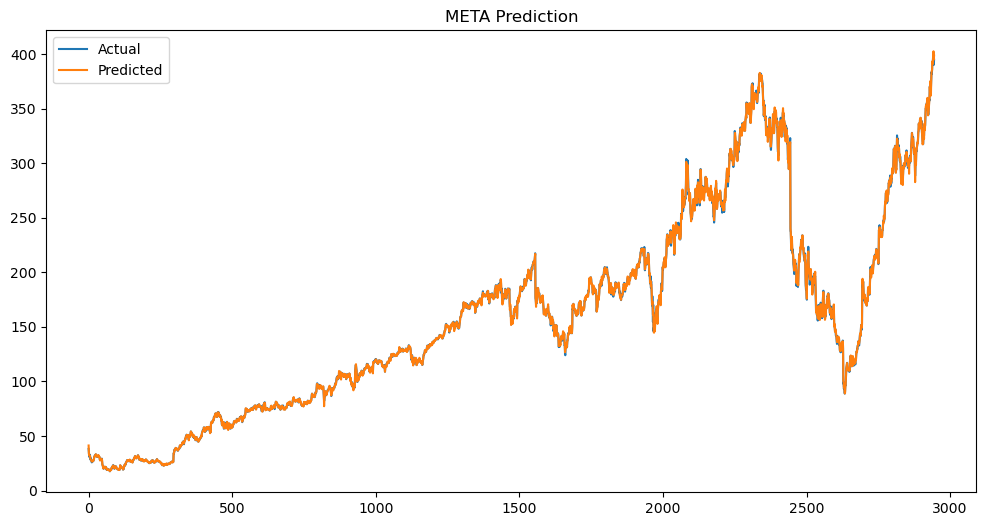

In [18]:
# Convert Spark DataFrame to Pandas DataFrame
meta_predictions_pd = meta_predictions.toPandas()

plt.figure(figsize=(12,6))
plt.plot(meta_predictions_pd['Close'], label='Actual')
plt.plot(meta_predictions_pd['prediction'], label='Predicted')
plt.title('META Prediction')
plt.legend()
plt.show()